In [73]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm_drop.xlsx")


In [74]:
data_main

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,0.0,0.260917,0.242424
635,635,0.0,0.260917,0.242424


In [75]:
data

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,NaN,NaN,NaN
635,635,0.0,0.260917,0.242424


In [76]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

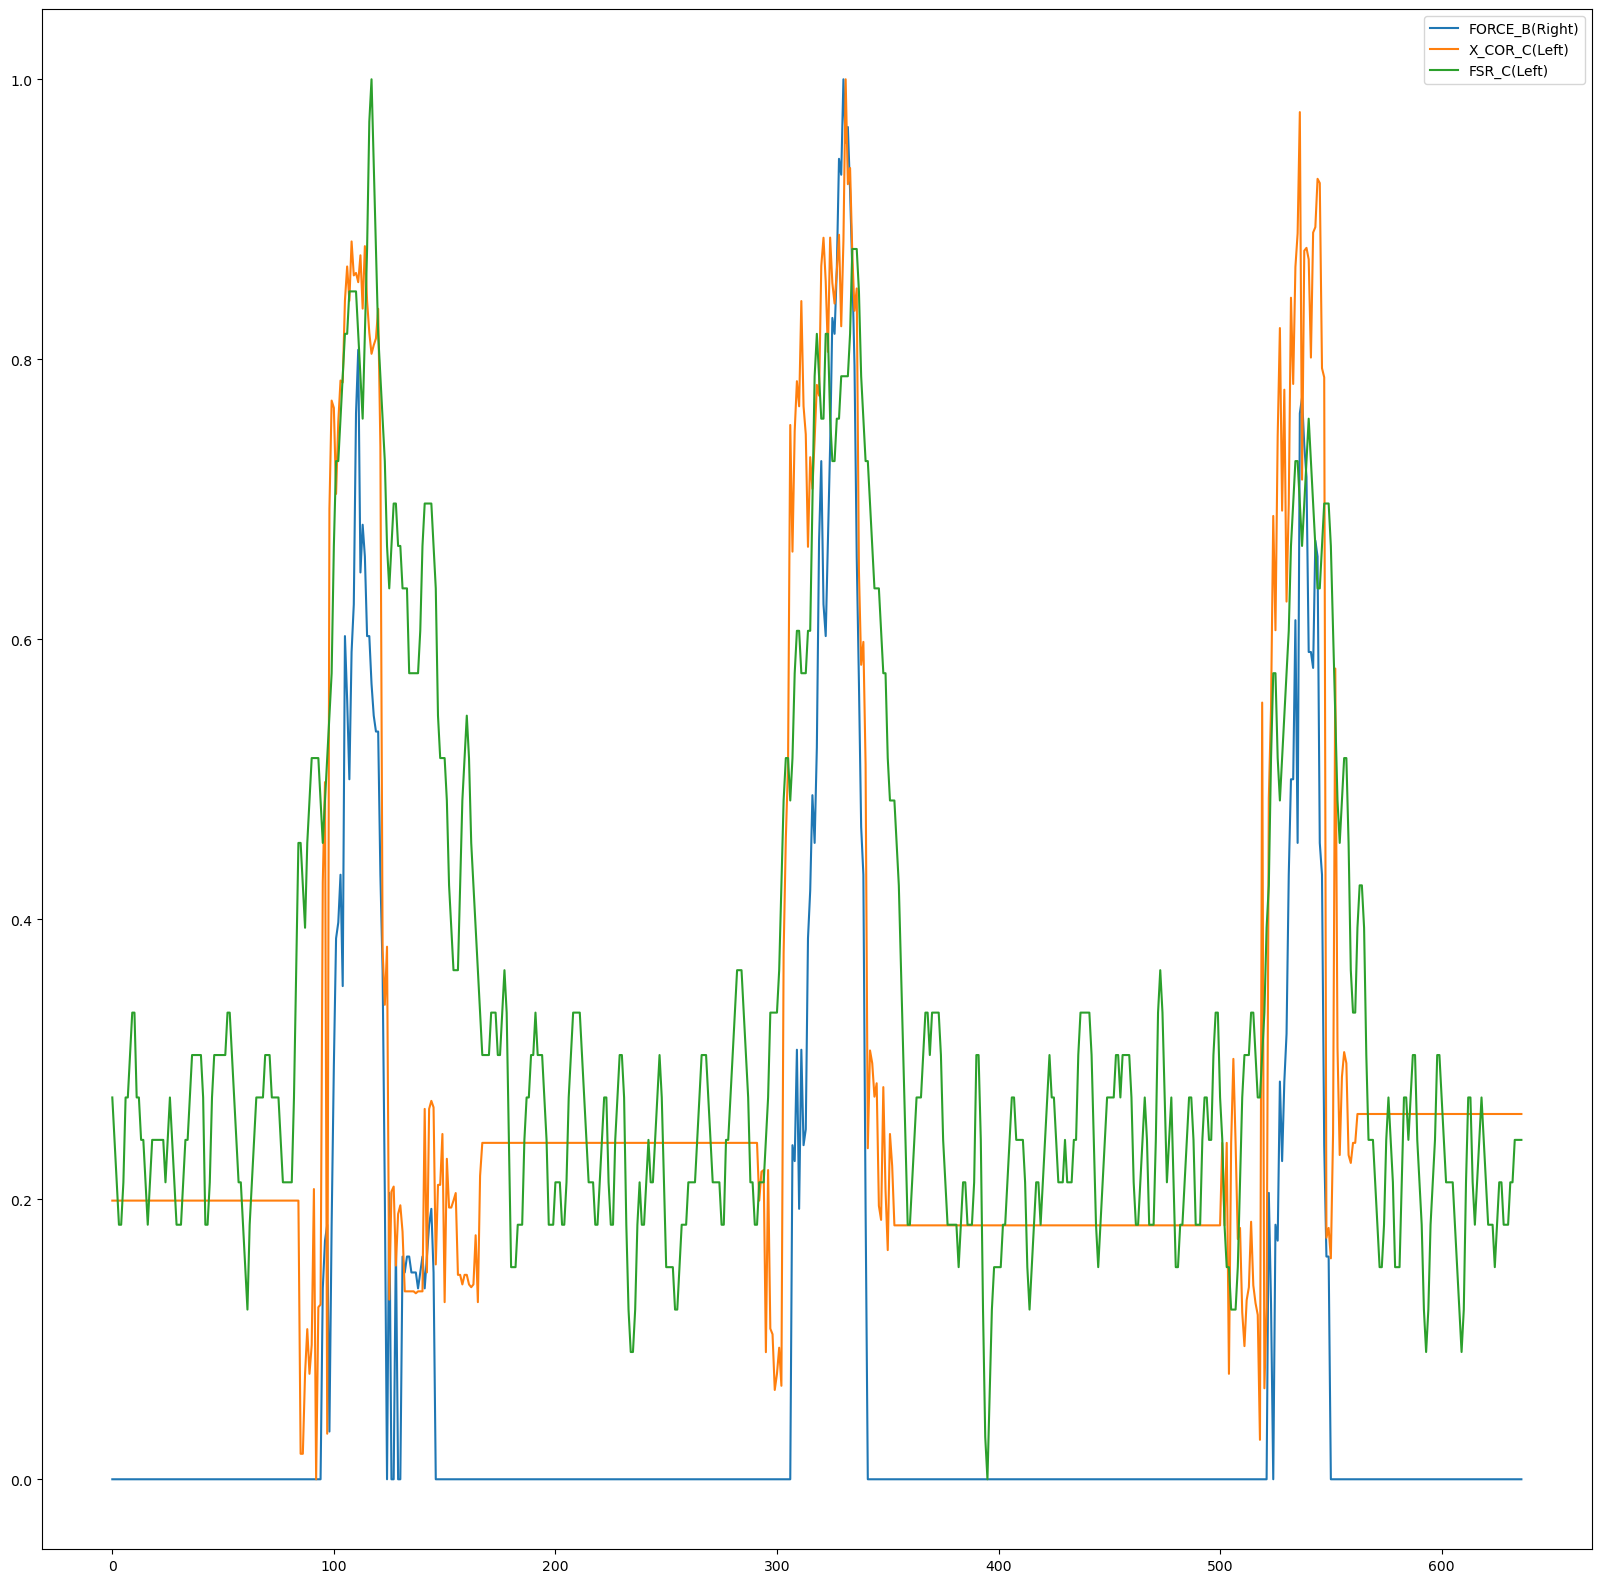

In [77]:
data_main.plot(figsize=(20,20))

<Axes: >

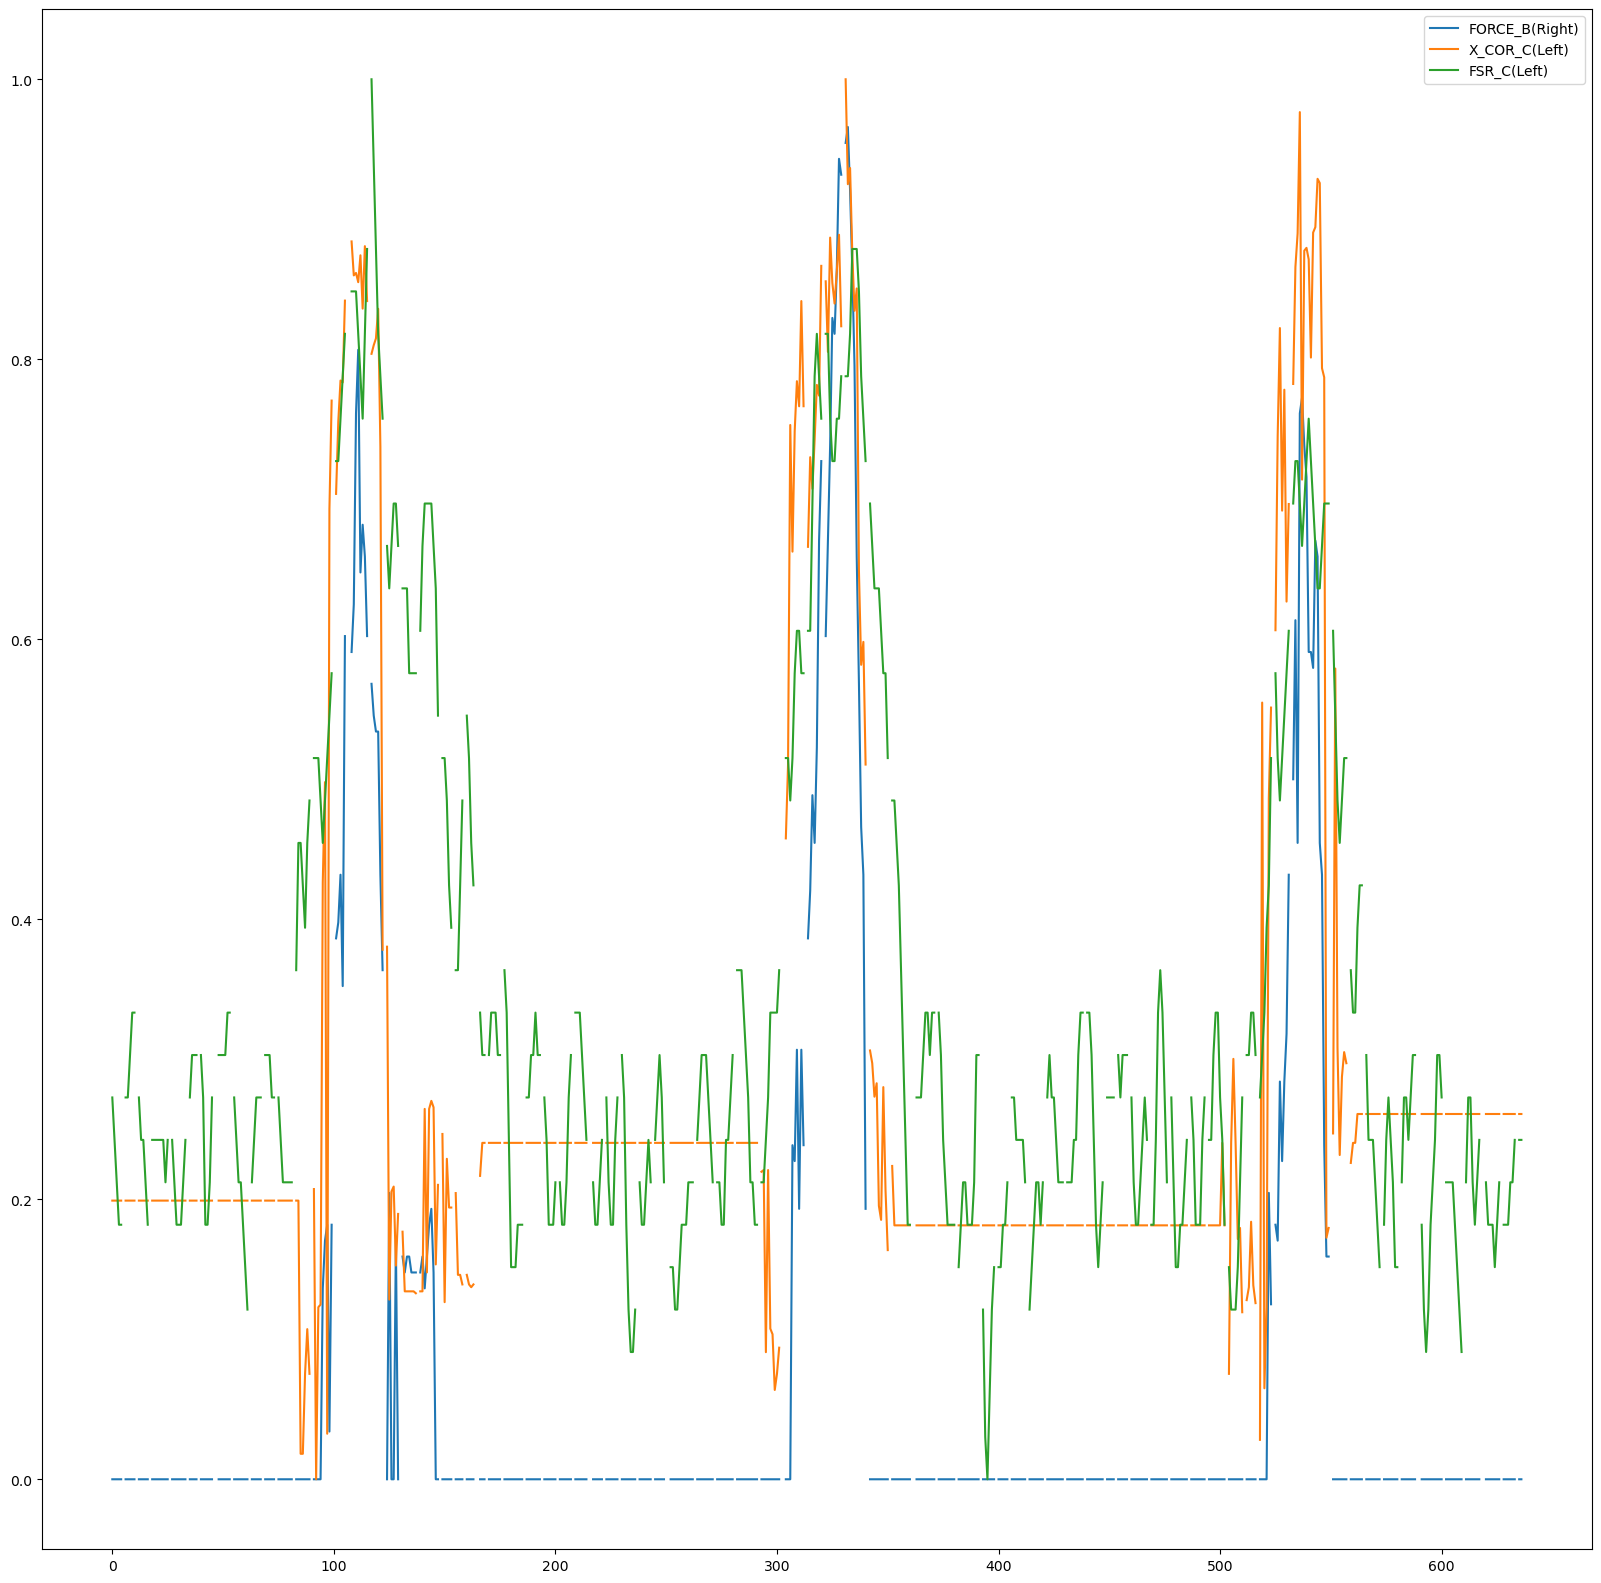

In [78]:
data.plot(figsize=(20,20))

In [79]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)    87
X_COR_C(Left)     87
FSR_C(Left)       87
dtype: int64
FORCE_B(Right)    0
X_COR_C(Left)     0
FSR_C(Left)       0
dtype: int64


FORCE_B(Right)


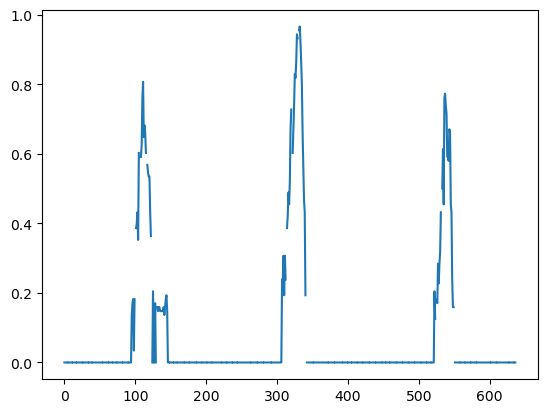

X_COR_C(Left)


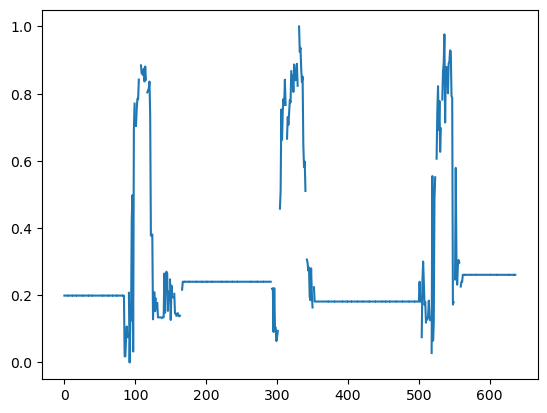

FSR_C(Left)


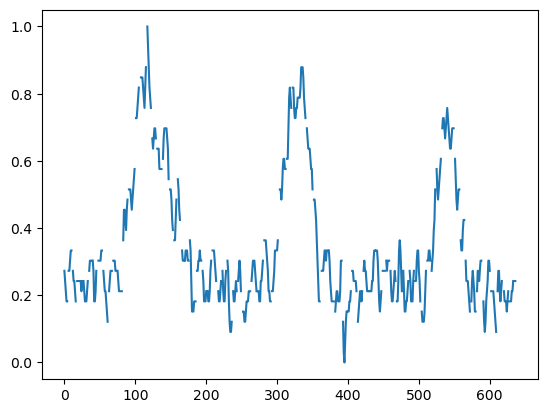

In [80]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [81]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [82]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_data_main.xlsx")





In [83]:
data_sca.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [84]:
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)

In [85]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)

L_new=L_scaled.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")


R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]


<Axes: >

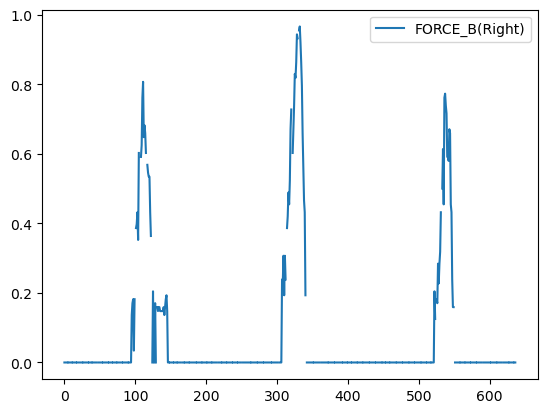

In [86]:
R.plot()

<Axes: >

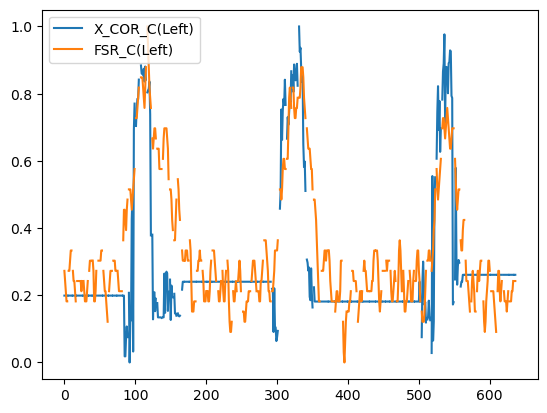

In [87]:
L.plot()

In [88]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [89]:
index=L.index

loss_index_L_XCOR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_XCOR_C=np.setdiff1d(index,loss_index_L_XCOR_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [90]:
## R_FORCE_B : L_XCOR_C
##  R_FORCE_B : L_FSR_C 

In [91]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_XCOR_C=L.iloc[normal_index_L_XCOR_C,0]
x_test_L_XCOR_C=loss_index_L_XCOR_C

y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_XCOR_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [92]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_XCOR_C.shape)

(550, 1)
(550,)


In [93]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_XCOR_C=x_test_L_XCOR_C.reshape(x_test_L_XCOR_C.shape[0],x_test_L_XCOR_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [94]:
print(x_test_L_XCOR_C.shape)
print(x_test_L_FSR_C.shape)

(87, 1, 1)
(87, 1, 1)


In [95]:
#[I 2023-11-30 09:43:29,893] Trial 19 finished with value: 0.02930739969080654 and parameters: {'batch_size': 102, 'steps_per_epoch': 9, 'epochs': 3481, 'filter': 136, 'lstm_par1': 244, 'lstm_par2': 242, 'lstm_par3': 201, 'lstm_par4': 244, 'dense_par': 20, 'dense_par2': 24, 'dense_par3': 85, 'dense_par4': 53, 'dim1': 2, 'dim2': 1, 'dim3': 7, 'dim4': 3}. Best is trial 0 with value: 0.021974889546016813.
#{'batch_size': 138, 'steps_per_epoch': 10, 'epochs': 2913, 'filter': 63, 'lstm_par1': 128, 'lstm_par2': 464, 'lstm_par3': 133, 'lstm_par4': 490, 'dense_par': 1, 'dense_par2': 70, 'dense_par3': 89, 'dense_par4': 1, 'dim1': 10, 'dim2': 3, 'dim3': 10, 'dim4': 5}

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=120, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(128, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(464, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(247, return_sequences=True,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par4, return_sequences=True,dropout=drop4,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(154, activation='relu',kernel_initializer = 'uniform',input_dim=4)))
model_cnnbilstm.add(TimeDistributed(Dense(197, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Dense(162, activation='relu',kernel_initializer = 'uniform',input_dim=9)))
model_cnnbilstm.add(TimeDistributed(Dense(104, activation='relu',kernel_initializer = 'uniform',input_dim=9)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_32 (TimeDi  (None, None, 1, 120)     240       
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, None, 1, 120)     0         
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, None, 120)        0         
 stributed)                                                      
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 256)        254976    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, None, 928)       

In [97]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_XCOR_C,epochs=10000,verbose=2,batch_size=100,steps_per_epoch=5)
pred=model_cnnbilstm.predict(x_test_L_XCOR_C)
pred=pred.reshape(-1,1)

Epoch 1/10000
5/5 - 3s - loss: 0.1117 - 3s/epoch - 544ms/step
Epoch 2/10000
5/5 - 0s - loss: 0.0721 - 102ms/epoch - 20ms/step
Epoch 3/10000
5/5 - 0s - loss: 0.0546 - 103ms/epoch - 21ms/step
Epoch 4/10000
5/5 - 0s - loss: 0.0423 - 93ms/epoch - 19ms/step
Epoch 5/10000
5/5 - 0s - loss: 0.0438 - 86ms/epoch - 17ms/step
Epoch 6/10000
5/5 - 0s - loss: 0.0459 - 87ms/epoch - 17ms/step
Epoch 7/10000
5/5 - 0s - loss: 0.0428 - 92ms/epoch - 18ms/step
Epoch 8/10000
5/5 - 0s - loss: 0.0491 - 89ms/epoch - 18ms/step
Epoch 9/10000
5/5 - 0s - loss: 0.0434 - 90ms/epoch - 18ms/step
Epoch 10/10000
5/5 - 0s - loss: 0.0457 - 85ms/epoch - 17ms/step
Epoch 11/10000
5/5 - 0s - loss: 0.0436 - 88ms/epoch - 18ms/step
Epoch 12/10000
5/5 - 0s - loss: 0.0424 - 93ms/epoch - 19ms/step
Epoch 13/10000
5/5 - 0s - loss: 0.0452 - 100ms/epoch - 20ms/step
Epoch 14/10000
5/5 - 0s - loss: 0.0395 - 91ms/epoch - 18ms/step
Epoch 15/10000
5/5 - 0s - loss: 0.0524 - 88ms/epoch - 18ms/step
Epoch 16/10000
5/5 - 0s - loss: 0.0409 - 87ms/e

In [98]:
c=0
for i in loss_index_L_XCOR_C:    
    L_XCOR_C[i]=pred[c]
    c+=1

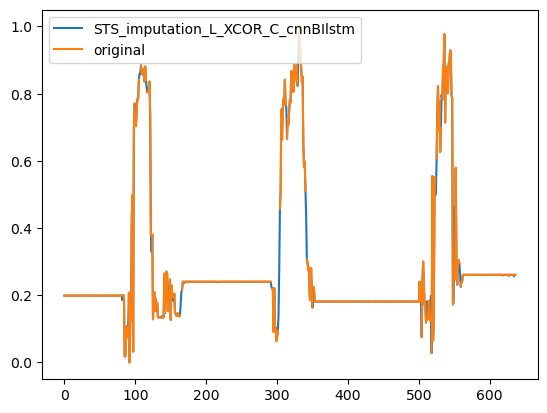

In [99]:
import matplotlib.pyplot as plt 
plt.plot(L_XCOR_C,label='STS_imputation_L_XCOR_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [100]:
#Trial 13 finished with value: 0.16169505337969475 and parameters: {'batch_size': 56, 'steps_per_epoch': 7, 'epochs': 5899, 'filter': 15, 'lstm_par1': 183, 'lstm_par2': 178, 'lstm_par3': 121, 'dense_par': 164, 'dense_par1': 137, 'dense_par2': 168, 'dense_par3': 198, 'dim1': 3, 'dim2': 6, 'dim3': 5, 'dim4': 7}. Best is trial 13 with value: 0.16169505337969475.


In [101]:
model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=120, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(183, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(178, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(121, return_sequences=True,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par4, return_sequences=True,dropout=drop4,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(164, activation='relu',kernel_initializer = 'uniform',input_dim=3)))
model_cnnbilstm.add(TimeDistributed(Dense(137, activation='relu',kernel_initializer = 'uniform',input_dim=6)))
model_cnnbilstm.add(TimeDistributed(Dense(168, activation='relu',kernel_initializer = 'uniform',input_dim=5)))
model_cnnbilstm.add(TimeDistributed(Dense(198, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_40 (TimeDi  (None, None, 1, 120)     240       
 stributed)                                                      
                                                                 
 time_distributed_41 (TimeDi  (None, None, 1, 120)     0         
 stributed)                                                      
                                                                 
 time_distributed_42 (TimeDi  (None, None, 120)        0         
 stributed)                                                      
                                                                 
 bidirectional_15 (Bidirecti  (None, None, 366)        445056    
 onal)                                                           
                                                                 
 bidirectional_16 (Bidirecti  (None, None, 356)       

In [102]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FSR_C,epochs=10000,verbose=2,batch_size=140,steps_per_epoch=2)
pred=model_cnnbilstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

Epoch 1/10000
2/2 - 2s - loss: 0.1478 - 2s/epoch - 1s/step
Epoch 2/10000
2/2 - 0s - loss: 0.1071 - 20ms/epoch - 10ms/step
Epoch 3/10000
2/2 - 0s - loss: 0.1027 - 18ms/epoch - 9ms/step
Epoch 4/10000
2/2 - 0s - loss: 0.0687 - 18ms/epoch - 9ms/step
Epoch 5/10000
2/2 - 0s - loss: 0.0649 - 17ms/epoch - 9ms/step
Epoch 6/10000
2/2 - 0s - loss: 0.0612 - 19ms/epoch - 9ms/step
Epoch 7/10000
2/2 - 0s - loss: 0.0490 - 19ms/epoch - 9ms/step
Epoch 8/10000
2/2 - 0s - loss: 0.0555 - 19ms/epoch - 9ms/step
Epoch 9/10000
2/2 - 0s - loss: 0.0505 - 20ms/epoch - 10ms/step
Epoch 10/10000
2/2 - 0s - loss: 0.0414 - 19ms/epoch - 9ms/step
Epoch 11/10000
2/2 - 0s - loss: 0.0333 - 18ms/epoch - 9ms/step
Epoch 12/10000
2/2 - 0s - loss: 0.0399 - 18ms/epoch - 9ms/step
Epoch 13/10000
2/2 - 0s - loss: 0.0371 - 19ms/epoch - 10ms/step
Epoch 14/10000
2/2 - 0s - loss: 0.0353 - 18ms/epoch - 9ms/step
Epoch 15/10000
2/2 - 0s - loss: 0.0381 - 18ms/epoch - 9ms/step
Epoch 16/10000
2/2 - 0s - loss: 0.0359 - 18ms/epoch - 9ms/step
E

In [103]:
pred=model_cnnbilstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 0s 2ms/step


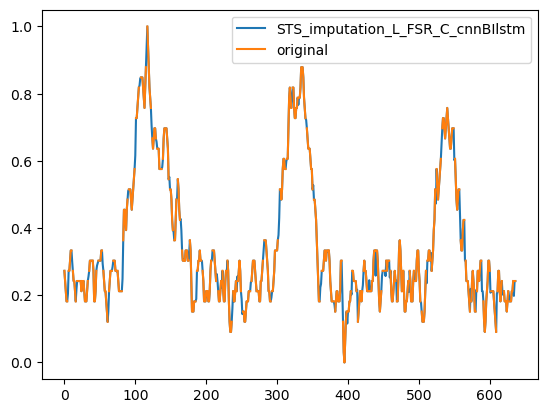

In [104]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='STS_imputation_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [105]:
#0.029232138442524435
#0.01572283862984011

In [106]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['X_COR_C(Left)'],L_XCOR_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.018704726555597084
0.013898286126156545


In [107]:
#0.0159302899571688
#0.016904522147842667

In [108]:
L.columns

Index(['X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [109]:
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]

In [110]:
L.isnull().sum()

X_COR_C(Left)    87
FSR_C(Left)      87
dtype: int64

In [111]:
for i in loss_index_L_XCOR_C:    
    L['X_COR_C(Left)'][i]=L_XCOR_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]
    

In [112]:
L.isnull().sum()

X_COR_C(Left)    0
FSR_C(Left)      0
dtype: int64

<Axes: >

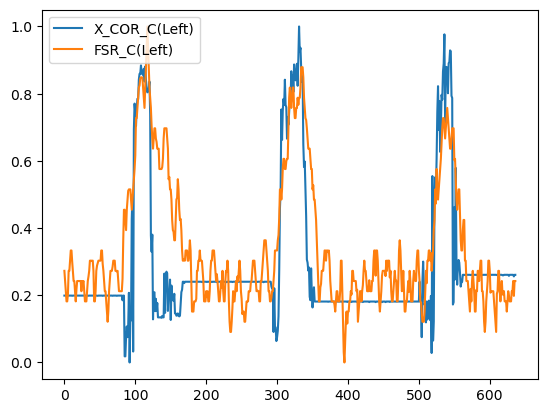

In [113]:
L=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

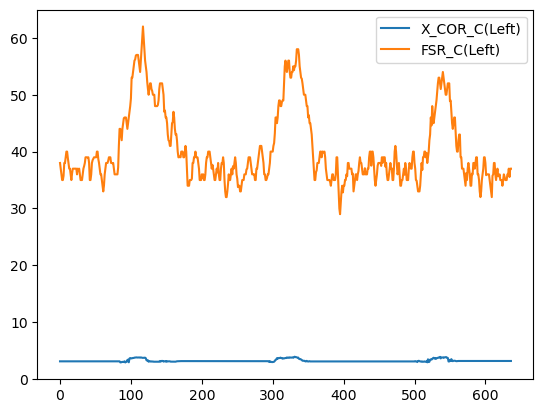

In [114]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()